<a href="https://colab.research.google.com/github/sahithi-streamer/covid_analysis/blob/main/Majorproject_Covid_19Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

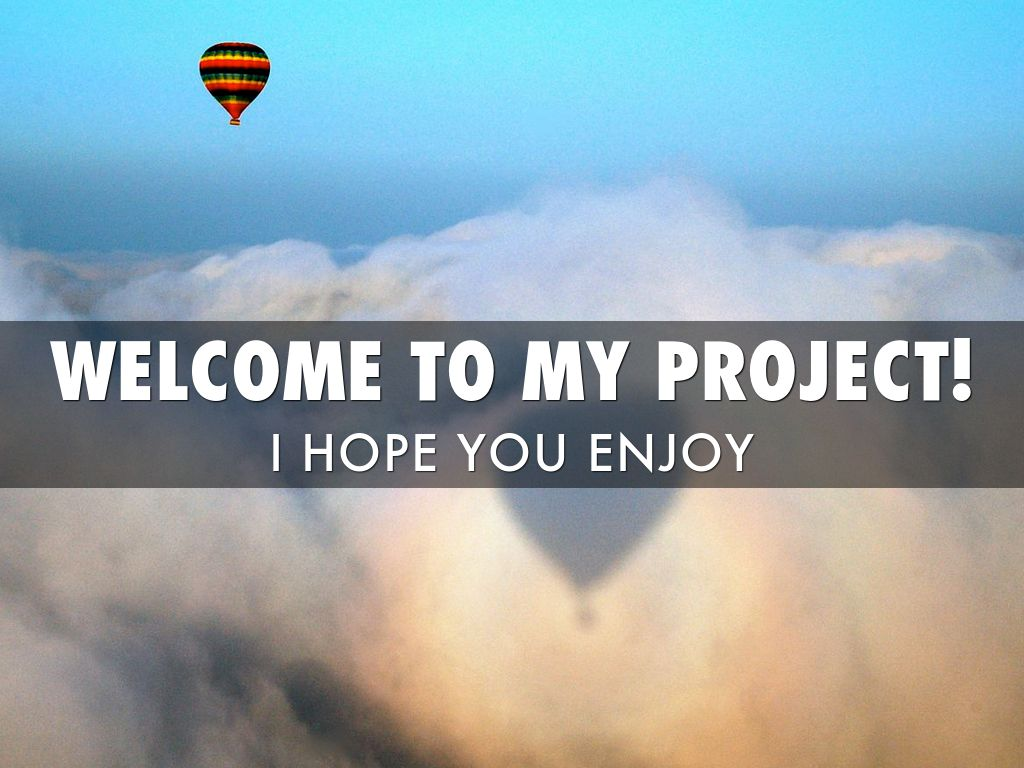

# *Covid 19 Analysis and Forecasting *


link for the dataset used:-https://covid.ourworldindata.org/data/owid-covid-data.csv

In [ ]:
# DATA SCIENCE PROJECT
# COVID-19 PANDEMIC ANALYSIS
####
#Imporing the required libraries
import pandas as pd
covid=pd.read_csv('/content/drive/MyDrive/smartknower-may/owid-covid-data.csv')

In [ ]:
#Having a glance at some of the records
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN


In [ ]:
# Data Analysis
#checking the column names
covid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
#checking at the shape 
covid.shape

(100920, 60)

In [ ]:
#checking for any null values in columns
covid.isnull().sum()

iso_code                                      0
continent                                  4723
location                                      0
date                                          0
total_cases                                3733
new_cases                                  3736
new_cases_smoothed                         4746
total_deaths                              13907
new_deaths                                13751
new_deaths_smoothed                        4746
total_cases_per_million                    4250
new_cases_per_million                      4253
new_cases_smoothed_per_million             5258
total_deaths_per_million                  14411
new_deaths_per_million                    14255
new_deaths_smoothed_per_million            5258
reproduction_rate                         19803
icu_patients                              90802
icu_patients_per_million                  90802
hosp_patients                             88352
hosp_patients_per_million               

In [ ]:
covid['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [ ]:
 ## PREPROCESSING THE DATA

#creating the other New_dataframe of selected information
covid_df=covid[['location','date','continent','total_cases', 'new_cases','total_deaths', 'new_deaths','new_tests', 'total_tests','total_vaccinations',
       'people_vaccinated','people_fully_vaccinated','new_vaccinations']]
covid_df.head() 

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
0,Afghanistan,2020-02-24,Asia,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2020-02-25,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2020-02-26,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2020-02-27,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2020-02-28,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
covid_df.shape


(100920, 13)

**India**

In [ ]:
#Getting required information of India into a new dataframe
india_case=covid_df[covid_df['location']=='India']
india_case.head()

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
41734,India,2020-01-30,Asia,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41735,India,2020-01-31,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41736,India,2020-02-01,Asia,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41737,India,2020-02-02,Asia,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41738,India,2020-02-03,Asia,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
india_case.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 41734 to 42258
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 525 non-null    object 
 1   date                     525 non-null    object 
 2   continent                525 non-null    object 
 3   total_cases              525 non-null    float64
 4   new_cases                525 non-null    float64
 5   total_deaths             484 non-null    float64
 6   new_deaths               484 non-null    float64
 7   new_tests                455 non-null    float64
 8   total_tests              465 non-null    float64
 9   total_vaccinations       169 non-null    float64
 10  people_vaccinated        169 non-null    float64
 11  people_fully_vaccinated  140 non-null    float64
 12  new_vaccinations         164 non-null    float64
dtypes: float64(10), object(3)
memory usage: 57.4+ KB


In [ ]:
# checking the final null values
india_case.isnull().sum()

location                     0
date                         0
continent                    0
total_cases                  0
new_cases                    0
total_deaths                41
new_deaths                  41
new_tests                   70
total_tests                 60
total_vaccinations         356
people_vaccinated          356
people_fully_vaccinated    385
new_vaccinations           361
dtype: int64

In [ ]:
india_case.tail()

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
42254,India,2021-07-03,Asia,30545433.0,43071.0,402005.0,955.0,2164943.0,416416463.0,344300590.0,282231365.0,62069225.0,8628796.0
42255,India,2021-07-04,Asia,30585229.0,39796.0,402728.0,723.0,1838490.0,418254953.0,347378550.0,284455266.0,62923284.0,3077960.0
42256,India,2021-07-05,Asia,30619932.0,34703.0,403281.0,553.0,1522504.0,419777457.0,351229497.0,286751758.0,64477739.0,3850947.0
42257,India,2021-07-06,Asia,30663665.0,43733.0,404211.0,930.0,1647424.0,421424881.0,354307646.0,288782557.0,65525089.0,3078149.0
42258,India,2021-07-07,Asia,30709557.0,45892.0,405028.0,817.0,NaN,NaN,358070763.0,291184757.0,66886006.0,3763117.0


In [ ]:
# ds- Date 
# y - new_cases
# Rename the columns  in dataframe as above mentioned
india_case=india_case.rename(columns={'date':'ds','new_cases':'y'})

In [ ]:
india_case=india_case[['ds','y']]

In [ ]:
india_case

,ds,y
41734,2020-01-30,1.0
41735,2020-01-31,0.0
41736,2020-02-01,0.0
41737,2020-02-02,1.0
41738,2020-02-03,1.0
...,...,...
42254,2021-07-03,43071.0
42255,2021-07-04,39796.0
42256,2021-07-05,34703.0
42257,2021-07-06,43733.0


In [ ]:
# Converting into respective datatypes required
# Droping all the unwanted columns 
india_case['ds']=pd.to_datetime(india_case['ds'])
india_case['y']=india_case['y'].astype(int)

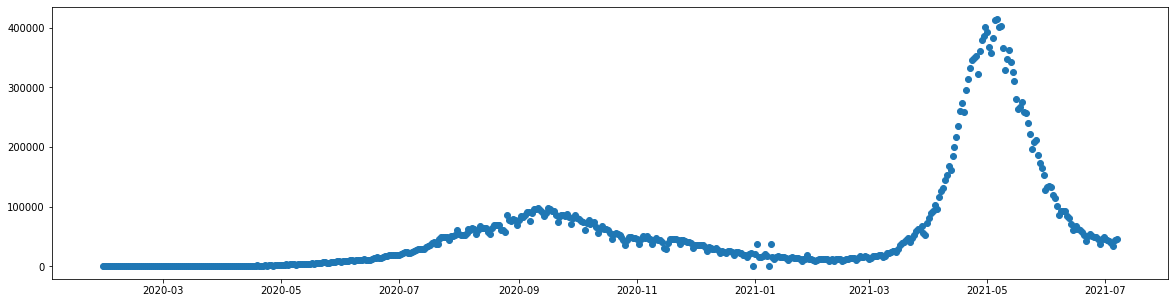

In [ ]:
# Plotting and analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(india_case['ds'],india_case['y'])

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


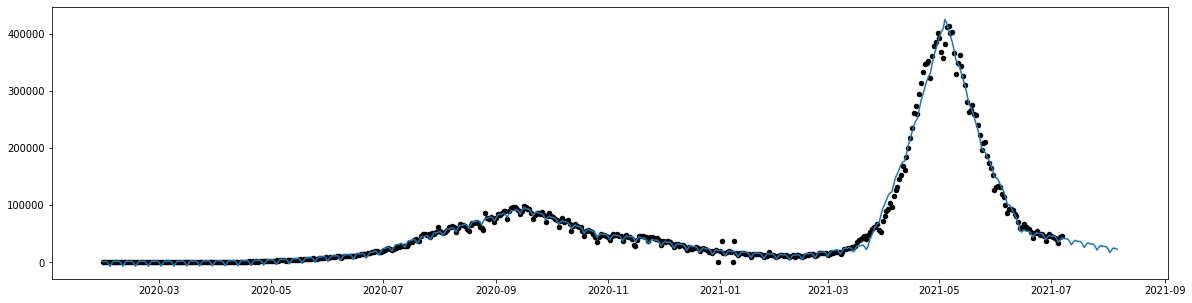

In [ ]:
# Forcasting the data of India cases for 30days
from fbprophet import Prophet
model_india_new_cases=Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.999)
model_india_new_cases.fit(india_case)
future = model_india_new_cases.make_future_dataframe(periods=30,freq='D')
forecast_india_new_cases = model_india_new_cases.predict(future)
plt.figure(figsize=(20,5))
plt.plot(forecast_india_new_cases['ds'],forecast_india_new_cases['yhat'])
plt.scatter(india_case['ds'],india_case['y'],s=20,c='k')

In [ ]:
 forecast_india_new_cases[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,1393.094974,-12017.135910,14761.665298
1,2020-01-31,1547.445502,-10865.543281,14929.492823
2,2020-02-01,1979.052748,-10844.245327,14704.056336
3,2020-02-02,-1116.209725,-13152.959527,11482.347767
4,2020-02-03,-7169.081635,-20117.192076,5737.385636
...,...,...,...,...
550,2021-08-02,17081.704512,-59917.847273,88382.856906
551,2021-08-03,21839.537131,-55540.956166,91640.786384
552,2021-08-04,25255.051732,-59236.377995,100310.505263
553,2021-08-05,23785.184525,-66102.672788,102965.805742


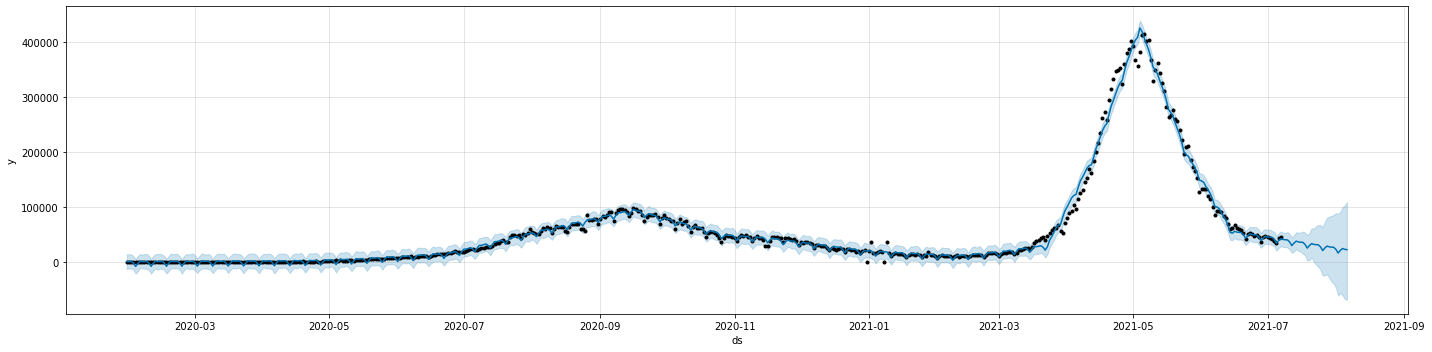

In [ ]:
# showing the yhat-lower and yhat-upper in the graph 
model_india_new_cases.plot(forecast_india_new_cases,figsize=(20,5));

FORECASTING FOR ASIA

In [ ]:
#Getting required information of India into a new dataframe
Asia_case=covid_df[covid_df['location']=='Asia']
Asia_case.head()

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
4757,Asia,2020-01-22,NaN,556.0,0.0,17.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4758,Asia,2020-01-23,NaN,654.0,98.0,18.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4759,Asia,2020-01-24,NaN,937.0,283.0,26.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4760,Asia,2020-01-25,NaN,1428.0,491.0,42.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
4761,Asia,2020-01-26,NaN,2105.0,677.0,56.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ds- Date 
# y - new_cases
# Rename the columns  in dataframe as above mentioned
Asia_case=Asia_case.rename(columns={'date':'ds','new_cases':'y'})

In [ ]:
Asia_case=Asia_case[['ds','y']]
Asia_case

,ds,y
4757,2020-01-22,0.0
4758,2020-01-23,98.0
4759,2020-01-24,283.0
4760,2020-01-25,491.0
4761,2020-01-26,677.0
...,...,...
5285,2021-07-03,141778.0
5286,2021-07-04,142994.0
5287,2021-07-05,153668.0
5288,2021-07-06,166303.0


In [ ]:
# Converting into respective datatypes required
# Droping all the unwanted columns 
Asia_case['ds']=pd.to_datetime(Asia_case['ds'])
Asia_case['y']=Asia_case['y'].astype(int)

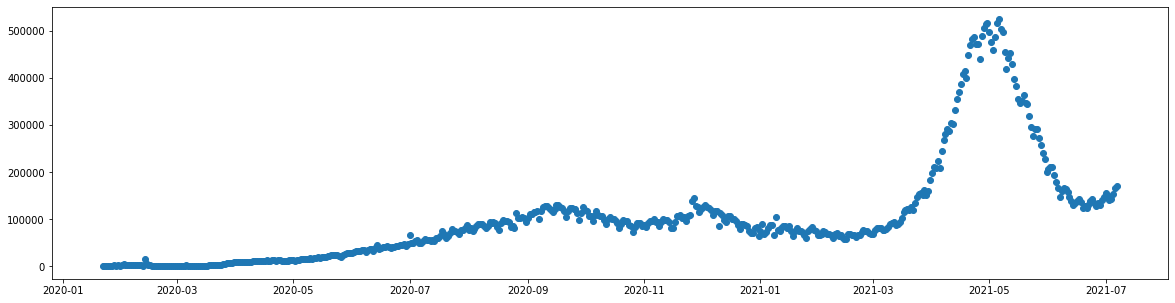

In [ ]:
# Plotting and analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(Asia_case['ds'],Asia_case['y'])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


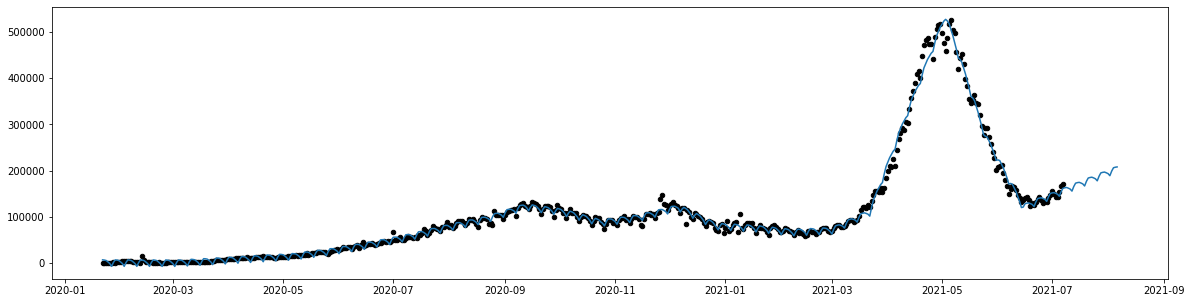

In [ ]:
# Forcasting the data of India cases for 30days
from fbprophet import Prophet
model_Asia_new_cases=Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.999)
model_Asia_new_cases.fit(Asia_case)
future = model_Asia_new_cases.make_future_dataframe(periods=30,freq='D')
forecast_Asia_new_cases = model_Asia_new_cases.predict(future)
plt.figure(figsize=(20,5))
plt.plot(forecast_Asia_new_cases['ds'],forecast_Asia_new_cases['yhat'])
plt.scatter(Asia_case['ds'],Asia_case['y'],s=20,c='k')

In [ ]:
forecast_Asia_new_cases[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,6601.419780,-9688.300356,22606.955311
1,2020-01-23,6137.829973,-9974.823074,21883.777696
2,2020-01-24,5176.630769,-10661.364928,20398.542537
3,2020-01-25,2086.161153,-12718.862201,16951.110086
4,2020-01-26,-1420.655142,-17337.468410,14199.507886
...,...,...,...,...
558,2021-08-02,188887.806842,95213.818071,273661.845084
559,2021-08-03,198822.600990,103589.565429,282527.427612
560,2021-08-04,206103.857135,103155.099150,303070.741379
561,2021-08-05,207236.558406,94323.662159,304603.189450


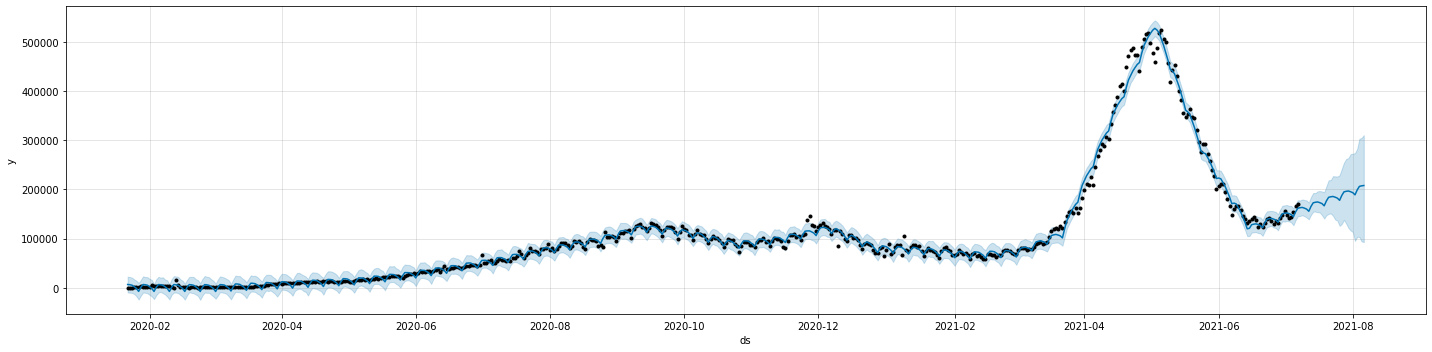

In [ ]:
 #showing the yhat-lower and yhat-upper in the graph 
model_Asia_new_cases.plot(forecast_Asia_new_cases,figsize=(20,5));

# **forming a final dataset containing final value**

In [ ]:
#data on date 2021-07-07
final_dataset=covid_df[covid_df['date']=='2021-07-07']
final_dataset

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
499,Afghanistan,2021-07-07,Asia,129021.0,1557.0,5415.0,55.0,NaN,NaN,9.344630e+05,7.352130e+05,199250.0,NaN
1010,Africa,2021-07-07,NaN,5775140.0,44362.0,148701.0,815.0,NaN,NaN,5.430569e+07,3.791783e+07,16692255.0,362009.0
1509,Albania,2021-07-07,Europe,132557.0,13.0,2456.0,0.0,NaN,NaN,1.005663e+06,5.795520e+05,426111.0,5600.0
2008,Algeria,2021-07-07,Africa,143032.0,585.0,3786.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2501,Andorra,2021-07-07,Europe,14021.0,30.0,127.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98874,Vietnam,2021-07-07,Asia,23385.0,1044.0,102.0,5.0,NaN,NaN,3.960956e+06,3.719043e+06,241913.0,32955.0
99513,World,2021-07-07,NaN,185075852.0,463849.0,4001746.0,8586.0,NaN,NaN,3.321280e+09,1.925321e+09,912745373.0,30282268.0
99967,Yemen,2021-07-07,Asia,6934.0,3.0,1364.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
100444,Zambia,2021-07-07,Africa,169003.0,1871.0,2618.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN


# **order for total cases**

In [ ]:
#sorting value in descending order
final_dataset=final_dataset.sort_values(['total_cases'],ascending=False)
final_dataset.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
99513,World,2021-07-07,NaN,185075852.0,463849.0,4001746.0,8586.0,NaN,NaN,3.321280e+09,1.925321e+09,912745373.0,30282268.0
5289,Asia,2021-07-07,NaN,56901200.0,170853.0,807711.0,2964.0,NaN,NaN,2.067536e+09,1.157507e+09,403839689.0,19686898.0
30874,Europe,2021-07-07,NaN,48815436.0,96513.0,1112044.0,1044.0,NaN,NaN,5.413845e+08,3.232404e+08,227900078.0,6087732.0
67227,North America,2021-07-07,NaN,39900236.0,42879.0,906011.0,683.0,NaN,NaN,4.471249e+08,2.581773e+08,201128174.0,950945.0
96170,United States,2021-07-07,North America,33770444.0,22931.0,606218.0,312.0,NaN,NaN,3.316515e+08,1.828961e+08,157908171.0,437117.0
84407,South America,2021-07-07,NaN,33624179.0,108214.0,1026108.0,3073.0,NaN,NaN,2.002462e+08,1.405210e+08,60459819.0,3029209.0
31406,European Union,2021-07-07,NaN,32918137.0,38094.0,740898.0,235.0,NaN,NaN,3.906515e+08,2.355017e+08,164893140.0,5198272.0
42258,India,2021-07-07,Asia,30709557.0,45892.0,405028.0,817.0,NaN,NaN,3.580708e+08,2.911848e+08,66886006.0,3763117.0
13329,Brazil,2021-07-07,South America,18909037.0,54022.0,528540.0,1648.0,NaN,NaN,1.101018e+08,8.113448e+07,28967346.0,2473652.0
33215,France,2021-07-07,Europe,5856682.0,4083.0,111448.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN


Rest of the location above United States in upper dataset sorted in descending order wrt total cases is not a country so United States have highest total number of cases and number of total cases is 33770444.0


In [ ]:
final_dataset_2=final_dataset.sort_values(['total_cases'],ascending=True)
final_dataset_2.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
59441,Micronesia (country),2021-07-07,Oceania,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48601,Kiribati,2021-07-07,Oceania,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77653,Samoa,2021-07-07,Oceania,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57761,Marshall Islands,2021-07-07,Oceania,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97372,Vanuatu,2021-07-07,Oceania,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
82909,Solomon Islands,2021-07-07,Oceania,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97861,Vatican,2021-07-07,Europe,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37146,Grenada,2021-07-07,North America,161.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25930,Dominica,2021-07-07,North America,197.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13858,Brunei,2021-07-07,Asia,266.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Micronesia (country) with total cases as 1 having minimum total cases

# **order for deaths**

In [ ]:
#sorting value in descending order
final_dataset_3=final_dataset.sort_values(['total_deaths'],ascending=False)
final_dataset_3.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
99513,World,2021-07-07,NaN,185075852.0,463849.0,4001746.0,8586.0,NaN,NaN,3.321280e+09,1.925321e+09,912745373.0,30282268.0
30874,Europe,2021-07-07,NaN,48815436.0,96513.0,1112044.0,1044.0,NaN,NaN,5.413845e+08,3.232404e+08,227900078.0,6087732.0
84407,South America,2021-07-07,NaN,33624179.0,108214.0,1026108.0,3073.0,NaN,NaN,2.002462e+08,1.405210e+08,60459819.0,3029209.0
67227,North America,2021-07-07,NaN,39900236.0,42879.0,906011.0,683.0,NaN,NaN,4.471249e+08,2.581773e+08,201128174.0,950945.0
5289,Asia,2021-07-07,NaN,56901200.0,170853.0,807711.0,2964.0,NaN,NaN,2.067536e+09,1.157507e+09,403839689.0,19686898.0
31406,European Union,2021-07-07,NaN,32918137.0,38094.0,740898.0,235.0,NaN,NaN,3.906515e+08,2.355017e+08,164893140.0,5198272.0
96170,United States,2021-07-07,North America,33770444.0,22931.0,606218.0,312.0,NaN,NaN,3.316515e+08,1.828961e+08,157908171.0,437117.0
13329,Brazil,2021-07-07,South America,18909037.0,54022.0,528540.0,1648.0,NaN,NaN,1.101018e+08,8.113448e+07,28967346.0,2473652.0
42258,India,2021-07-07,Asia,30709557.0,45892.0,405028.0,817.0,NaN,NaN,3.580708e+08,2.911848e+08,66886006.0,3763117.0
59273,Mexico,2021-07-07,North America,2558369.0,8507.0,234192.0,234.0,NaN,NaN,NaN,NaN,NaN,NaN


United states with total deaths 606218.0 is having highest number of deaths

In [ ]:
final_dataset_4=final_dataset.sort_values(['total_cases'],ascending=True)
final_dataset_4.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
59441,Micronesia (country),2021-07-07,Oceania,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48601,Kiribati,2021-07-07,Oceania,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77653,Samoa,2021-07-07,Oceania,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57761,Marshall Islands,2021-07-07,Oceania,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97372,Vanuatu,2021-07-07,Oceania,4.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
82909,Solomon Islands,2021-07-07,Oceania,20.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97861,Vatican,2021-07-07,Europe,27.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37146,Grenada,2021-07-07,North America,161.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25930,Dominica,2021-07-07,North America,197.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13858,Brunei,2021-07-07,Asia,266.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


Vanuatu and Geranda with total deaths 1 having minimun number of people died

# **For vaccination**

In [ ]:
final_dataset_5=final_dataset.sort_values(['people_vaccinated'],ascending=True)
final_dataset_5.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
18465,Chad,2021-07-07,Africa,4952.0,0.0,174.0,0.0,NaN,NaN,20478.0,15966.0,4512.0,NaN
36673,Greenland,2021-07-07,North America,NaN,NaN,NaN,NaN,NaN,NaN,45956.0,31079.0,14877.0,1710.0
76940,Saint Lucia,2021-07-07,North America,5363.0,11.0,85.0,0.0,NaN,NaN,53323.0,31083.0,22240.0,134.0
31566,Faeroe Islands,2021-07-07,Europe,NaN,NaN,NaN,NaN,NaN,NaN,52975.0,31602.0,21373.0,1083.0
17509,Cayman Islands,2021-07-07,North America,NaN,NaN,NaN,NaN,NaN,NaN,94205.0,48722.0,45504.0,112.0
44936,Isle of Man,2021-07-07,Europe,NaN,NaN,NaN,NaN,NaN,NaN,112086.0,63984.0,48102.0,770.0
4756,Aruba,2021-07-07,North America,NaN,NaN,NaN,NaN,NaN,NaN,129646.0,68664.0,60982.0,484.0
22994,Curacao,2021-07-07,North America,NaN,NaN,NaN,NaN,NaN,NaN,168879.0,89474.0,79405.0,386.0
61386,Montenegro,2021-07-07,Europe,100392.0,30.0,1619.0,0.0,NaN,NaN,297632.0,155477.0,142155.0,1476.0
58242,Mauritania,2021-07-07,Africa,21303.0,67.0,490.0,1.0,NaN,NaN,174628.0,163150.0,11478.0,NaN


chad with people 15966.0 vaccinated is having minimum number of people vaccinated

In [ ]:
final_dataset_6=final_dataset.sort_values(['people_vaccinated'],ascending=False)
final_dataset_6.head(10)

,location,date,continent,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations
99513,World,2021-07-07,NaN,185075852.0,463849.0,4001746.0,8586.0,NaN,NaN,3.321280e+09,1.925321e+09,912745373.0,30282268.0
5289,Asia,2021-07-07,NaN,56901200.0,170853.0,807711.0,2964.0,NaN,NaN,2.067536e+09,1.157507e+09,403839689.0,19686898.0
30874,Europe,2021-07-07,NaN,48815436.0,96513.0,1112044.0,1044.0,NaN,NaN,5.413845e+08,3.232404e+08,227900078.0,6087732.0
42258,India,2021-07-07,Asia,30709557.0,45892.0,405028.0,817.0,NaN,NaN,3.580708e+08,2.911848e+08,66886006.0,3763117.0
67227,North America,2021-07-07,NaN,39900236.0,42879.0,906011.0,683.0,NaN,NaN,4.471249e+08,2.581773e+08,201128174.0,950945.0
31406,European Union,2021-07-07,NaN,32918137.0,38094.0,740898.0,235.0,NaN,NaN,3.906515e+08,2.355017e+08,164893140.0,5198272.0
96170,United States,2021-07-07,North America,33770444.0,22931.0,606218.0,312.0,NaN,NaN,3.316515e+08,1.828961e+08,157908171.0,437117.0
84407,South America,2021-07-07,NaN,33624179.0,108214.0,1026108.0,3073.0,NaN,NaN,2.002462e+08,1.405210e+08,60459819.0,3029209.0
13329,Brazil,2021-07-07,South America,18909037.0,54022.0,528540.0,1648.0,NaN,NaN,1.101018e+08,8.113448e+07,28967346.0,2473652.0
35351,Germany,2021-07-07,Europe,3740567.0,992.0,91148.0,30.0,NaN,NaN,7.972925e+07,4.787279e+07,33909828.0,961083.0


India with people 2.911848e+08 vaccinated is having highest number of people vaccinated

THANKYOU 
